## Analysis of Wildfire smoke impact on respiratory health for city of Rialto
In this notebook, I am going conduct an analysis of impact of fire smoke on lung diseases. The data is collected from tracking california website for the county of San Bernandino. The data was collected by querying for each year from the selection menu and updated to a csv manually. Web link: https://data.trackingcalifornia.org/ The data is stored in COPD-Emergency-Dept-Visits-Asthma.csv file.

In [ ]:
# importing libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Data Pre-processing

In [ ]:
# Importing datasets
smoke_data = pd.read_csv('smoke-estimate-data.csv')
smoke_data.head()


,year,smoke_estimate
0,2005,63.870539
1,2006,58.445159
2,2007,72.763410
3,2008,56.474446
4,2009,61.462382


In [ ]:
breathing_disorder = pd.read_csv('COPD-Emergency-Dept-Visits-Asthma.csv')

In [ ]:
# merge the datasets based on the year column
merged_data = pd.merge(smoke_data, breathing_disorder, left_on='year', right_on='Year')
#keep rows where all data is present
merged_data = merged_data.dropna()
# remove the year column
merged_data = merged_data.drop(columns=['Year'])
# rename hospitalization column as asthma related hospitalization
merged_data = merged_data.rename(columns={'Hospitalization': 'Asthma-related-hospitalization'})

In [ ]:
# save the dataframe to csv
merged_data.to_csv('smoke_breathing_data.csv', index=False)

## Analysis
Below are the statistical analysis conducted by using the smoke estimate data and the respiratory health data obtained for the county of san bernandino. Below is the processed data that will be used throughtout this analysis.

In [ ]:
sm_data = pd.read_csv('smoke_breathing_data.csv')
# this is the combined data containing smoke estimate and the respiratory health indicators.

Below is the visualisation of the data with time. Here the smoke estimate is scaled by multiplying by 100 so as to observe the time series graph along with the respiratory health data. Note: The scaling is done only for the visualization purpose and not in the analysis.

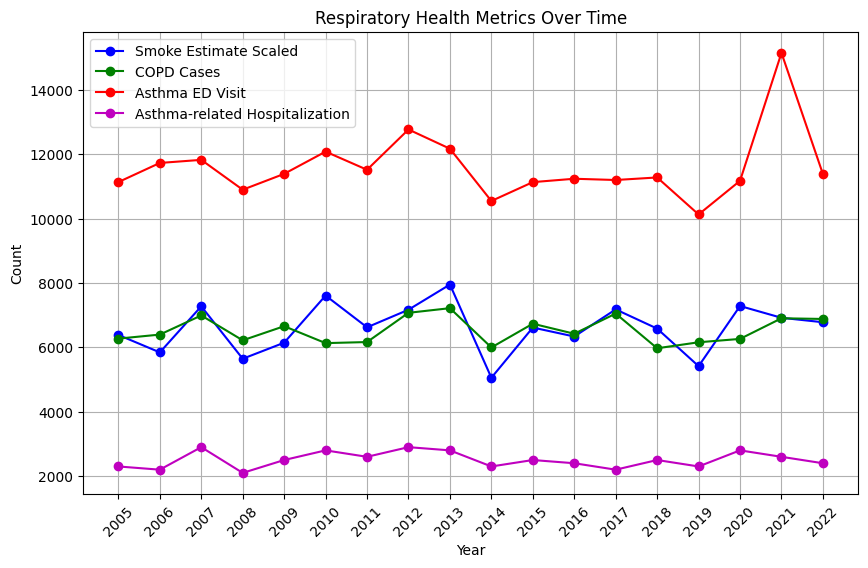

In [ ]:
# Plot all lines on the same plot
plt.figure(figsize=(10, 6))

# Plot each column against 'year'
plt.plot(sm_data["year"], sm_data["smoke_estimate"]* 100, marker='o', label="Smoke Estimate Scaled", color='b')
plt.plot(sm_data["year"], sm_data["COPD Cases"], marker='o', label="COPD Cases", color='g')
plt.plot(sm_data["year"], sm_data["Asthma ED Visit"], marker='o', label="Asthma ED Visit", color='r')
plt.plot(sm_data["year"], sm_data["Asthma-related-hospitalization"], marker='o', label="Asthma-related Hospitalization", color='m')

# Customize the plot
plt.title('Respiratory Health Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Count')

# Ensure the years are displayed properly (without decimals)
plt.xticks(sm_data["year"], rotation=45)  # Rotate and display years as integers

plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# to-do scale smoke estimate not visible in this graph



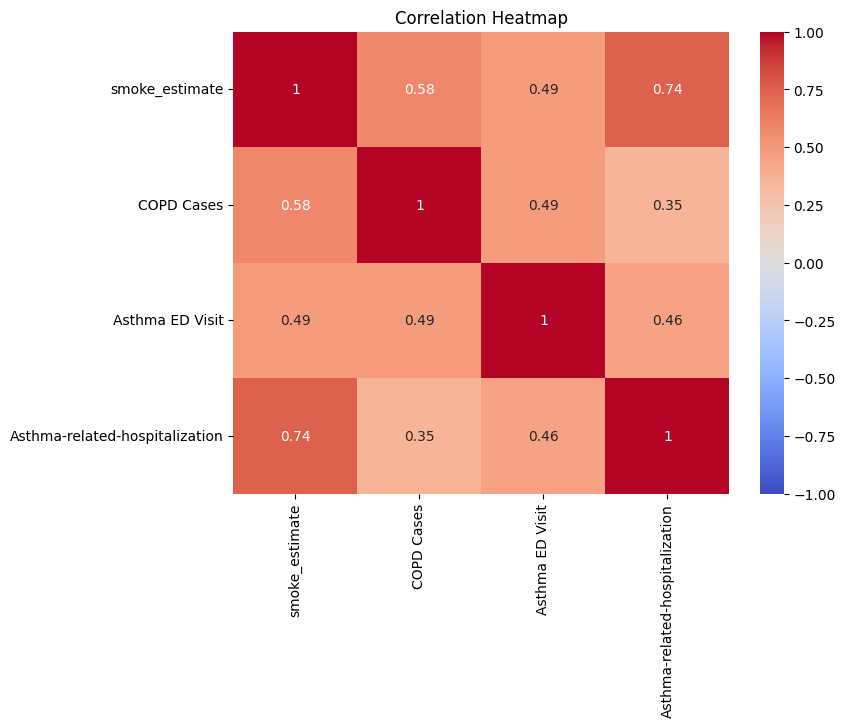

                                smoke_estimate  COPD Cases  Asthma ED Visit  \
smoke_estimate                        1.000000    0.582412         0.488730   
COPD Cases                            0.582412    1.000000         0.489242   
Asthma ED Visit                       0.488730    0.489242         1.000000   
Asthma-related-hospitalization        0.744602    0.354693         0.458444   

                                Asthma-related-hospitalization  
smoke_estimate                                        0.744602  
COPD Cases                                            0.354693  
Asthma ED Visit                                       0.458444  
Asthma-related-hospitalization                        1.000000  


In [ ]:
# Compute correlation matrix
correlation_matrix = sm_data.drop(columns=["year"]).corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

print(correlation_matrix)

### Correlation Analysis
The correlation analysis reveals a significant positive relationship between smoke exposure and respiratory health issues, including COPD cases and asthma-related conditions. Smoke exposure has a moderate positive correlation with COPD cases (0.582) and asthma-related emergency department visits (0.489), suggesting that higher smoke levels are associated with an increase in both conditions. The strongest correlation is observed between smoke exposure and asthma-related hospitalizations (0.744), highlighting the severe impact of smoke on asthma patients, potentially leading to more hospital admissions. These results underscore the critical role of air quality in influencing the prevalence and severity of respiratory diseases.

Additionally, the analysis indicates a moderate positive relationship between COPD cases and asthma-related hospitalizations (0.354), and between asthma ED visits and asthma-related hospitalizations (0.458). While the correlation between COPD and asthma-related hospitalizations is weaker, it suggests that individuals with COPD may be at a higher risk for asthma flare-ups requiring hospitalization. Overall, these findings provide compelling evidence of the adverse effects of smoke exposure on respiratory health, emphasizing the importance of reducing air pollution to mitigate health risks associated with respiratory diseases.

### Hypothesis Testing
**Null Hypothesis:** There is no relationship between smoke estimate and the health outcomes.  

**Alternative Hypothesis:** There is a significant relationship between smoke estimate and the health outcomes.

In [ ]:
from scipy.stats import pearsonr

# Conducting hypothesis test for smoke exposure and COPD cases
correlation_copd, p_value_copd = pearsonr(sm_data['smoke_estimate'], sm_data['COPD Cases'])
print(f"COPD Cases: Correlation = {correlation_copd}, p-value = {p_value_copd}")

# Conducting hypothesis test for smoke exposure and asthma ED visits
correlation_asthma, p_value_asthma = pearsonr(sm_data['smoke_estimate'], sm_data['Asthma ED Visit'])
print(f"Asthma ED Visits: Correlation = {correlation_asthma}, p-value = {p_value_asthma}")

# Conducting hypothesis test for smoke exposure and asthma-related hospitalizations
correlation_hospitalization, p_value_hospitalization = pearsonr(sm_data['smoke_estimate'], sm_data['Asthma-related-hospitalization'])
print(f"Asthma-related Hospitalizations: Correlation = {correlation_hospitalization}, p-value = {p_value_hospitalization}")

COPD Cases: Correlation = 0.5824119893704062, p-value = 0.011206640510168276
Asthma ED Visits: Correlation = 0.488730034146095, p-value = 0.03958072228864641
Asthma-related Hospitalizations: Correlation = 0.7446015809931038, p-value = 0.00039330679669175733


COPD Cases:

The correlation between smoke exposure and COPD cases is 0.582, indicating a moderate positive relationship. The p-value is 0.011, which is below the typical threshold of 0.05. This means that the relationship between smoke exposure and COPD cases is statistically significant. In other words, higher levels of smoke exposure are associated with an increase in COPD cases.
Asthma ED Visits:

The correlation between smoke exposure and asthma-related emergency department visits is 0.489, indicating a moderate positive relationship. The p-value is 0.040, which is also below the threshold of 0.05. This means that the relationship between smoke exposure and asthma ED visits is statistically significant. This suggests that as smoke exposure increases, the number of asthma-related emergency department visits also increases.
Asthma-related Hospitalizations:

The correlation between smoke exposure and asthma-related hospitalizations is 0.745, indicating a strong positive relationship. The p-value is 0.00039, which is much smaller than 0.05, confirming that the relationship is statistically significant. This indicates that higher smoke exposure is strongly associated with an increase in asthma-related hospitalizations.
Conclusion:
For all three outcomes—COPD cases, asthma ED visits, and asthma-related hospitalizations—there is a statistically significant positive relationship with smoke exposure. The results highlight the significant impact of smoke exposure on respiratory health, suggesting that efforts to reduce air pollution could help mitigate the associated health risks.

### Regression Analysis


In [ ]:

# Define a function for regression analysis
def perform_regression(y, x, label):
    x = sm.add_constant(x)  # Add constant for the intercept
    model = sm.OLS(y, x).fit()  # Fit the regression model
    print(f"--- Regression Analysis for {label} ---")
    print(model.summary())  # Display regression results
    print("\n")

# Perform regression analysis for each feature
perform_regression(sm_data["COPD Cases"], sm_data["smoke_estimate"], "COPD Cases")
perform_regression(sm_data["Asthma ED Visit"], sm_data["smoke_estimate"], "Asthma ED Visits")
perform_regression(sm_data["Asthma-related-hospitalization"], sm_data["smoke_estimate"], "Asthma-related Hospitalizations")


--- Regression Analysis for COPD Cases ---
                            OLS Regression Results                            
Dep. Variable:             COPD Cases   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     8.213
Date:                Wed, 27 Nov 2024   Prob (F-statistic):             0.0112
Time:                        23:04:59   Log-Likelihood:                -129.61
No. Observations:                  18   AIC:                             263.2
Df Residuals:                      16   BIC:                             265.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

**Inference:**  
**Statistical Significance:** All three models show a statistically significant relationship between smoke exposure and respiratory health outcomes.

**Strength of Relationships:**  
The strongest relationship is observed for asthma-related hospitalizations (R-squared = 0.554), where smoke exposure accounts for more than half of the variability in outcomes.  

COPD cases and asthma ED visits show weaker but still significant relationships, with R-squared values of 0.339 and 0.239, respectively.
Unexplained Variance: The moderate R-squared values for COPD cases and asthma ED visits highlight the need to consider additional factors, such as socioeconomic conditions, baseline health status, or access to healthcare, in future analyses.  

These results underscore the critical impact of smoke exposure on public health, particularly in driving hospitalizations related to asthma. Further research could incorporate additional variables to improve model performance and better understand the drivers of these health outcomes.

## Machine learning model to predict Asthma and COPD related Emergency department visits.

In [ ]:

# loading the smoke estimate data manually for the year 2023 to 20250 predicted in part one.
future_data = {
    "year": list(range(2023, 2051)),
    "smoke_estimate": [
        67.29567703, 67.09985288, 67.02610297, 66.99832779, 66.9878673, 66.98392775,
        66.98244406, 66.98188528, 66.98167484, 66.98159559, 66.98156574, 66.9815545,
        66.98155026, 66.98154867, 66.98154807, 66.98154784, 66.98154776, 66.98154772,
        66.98154771, 66.98154771, 66.98154771, 66.9815477, 66.9815477, 66.9815477,
        66.9815477, 66.9815477, 66.9815477, 66.9815477
    ]
}
future_df = pd.DataFrame(future_data)

# Build Random Forest models
copd_model = RandomForestRegressor(random_state=42, n_estimators=100)
asthma_ed_model = RandomForestRegressor(random_state=42, n_estimators=100)
hospitalization_model = RandomForestRegressor(random_state=42, n_estimators=100)


In [ ]:
# Train the models
copd_model.fit(np.array(sm_data["smoke_estimate"]).reshape(-1, 1), sm_data["COPD Cases"])
asthma_ed_model.fit(np.array(sm_data["smoke_estimate"]).reshape(-1, 1), sm_data["Asthma ED Visit"])
hospitalization_model.fit(np.array(sm_data["smoke_estimate"]).reshape(-1, 1), sm_data["Asthma-related-hospitalization"])

# Evaluate models using R-squared value
copd_r2 = r2_score(sm_data["COPD Cases"], copd_model.predict(np.array(sm_data["smoke_estimate"]).reshape(-1, 1)))
asthma_ed_r2 = r2_score(sm_data["Asthma ED Visit"], asthma_ed_model.predict(np.array(sm_data["smoke_estimate"]).reshape(-1, 1)))
hospitalization_r2 = r2_score(sm_data["Asthma-related-hospitalization"], hospitalization_model.predict(np.array(sm_data["smoke_estimate"]).reshape(-1, 1)))

print(f"R-squared for COPD Cases model: {copd_r2:.3f}")
print(f"R-squared for Asthma ED Visits model: {asthma_ed_r2:.3f}")
print(f"R-squared for Asthma-related Hospitalizations model: {hospitalization_r2:.3f}")

R-squared for COPD Cases model: 0.876
R-squared for Asthma ED Visits model: 0.843
R-squared for Asthma-related Hospitalizations model: 0.904


The R-squared values for the models indicate a strong fit between the predicted and actual data for all three health outcomes.  

**R-squared: 0.876**
This high R-squared value suggests that the model explains approximately 87.6% of the variance in COPD cases based on smoke exposure. The model is highly reliable in predicting COPD cases.
Asthma ED Visits Model:

**R-squared: 0.843**
With an R-squared value of 84.3%, the model effectively captures the relationship between smoke exposure and asthma-related emergency department visits. However, it is slightly less accurate than the COPD model, indicating room for minor improvement.
Asthma-related Hospitalizations Model:

**R-squared: 0.904**
This model shows the strongest fit, with 90.4% of the variance in asthma-related hospitalizations being explained by the smoke exposure data. This suggests that the model is highly effective in predicting hospitalizations related to asthma.  

All three models demonstrate high R-squared values, indicating that they effectively capture the relationships between smoke exposure and the respective health outcomes. Among the three, the Asthma-related Hospitalizations model has the strongest predictive accuracy.

These results validate the use of smoke exposure estimates as a reliable predictor of respiratory health impacts, supporting the hypothesis that increased smoke exposure is strongly associated with worsening health outcomes. Further refinement of the models may improve accuracy, but they are already robust enough for forecasting purposes.

In [ ]:
# Generate predictions for future data
future_df["COPD Cases"] = copd_model.predict(future_df[["smoke_estimate"]])
future_df["Asthma ED Visit"] = asthma_ed_model.predict(future_df[["smoke_estimate"]])
future_df["Asthma-related-hospitalization"] = hospitalization_model.predict(future_df[["smoke_estimate"]])

# Display predictions
print(future_df)

    year  smoke_estimate  COPD Cases  Asthma ED Visit  \
0   2023       67.295677     6723.07         11434.30   
1   2024       67.099853     6723.07         11434.30   
2   2025       67.026103     6428.69         11489.24   
3   2026       66.998328     6428.69         11489.24   
4   2027       66.987867     6400.57         11441.74   
5   2028       66.983928     6400.57         11441.74   
6   2029       66.982444     6400.57         11441.74   
7   2030       66.981885     6400.57         11441.74   
8   2031       66.981675     6400.57         11441.74   
9   2032       66.981596     6400.57         11441.74   
10  2033       66.981566     6400.57         11441.74   
11  2034       66.981555     6400.57         11441.74   
12  2035       66.981550     6400.57         11441.74   
13  2036       66.981549     6400.57         11441.74   
14  2037       66.981548     6400.57         11441.74   
15  2038       66.981548     6400.57         11441.74   
16  2039       66.981548     64

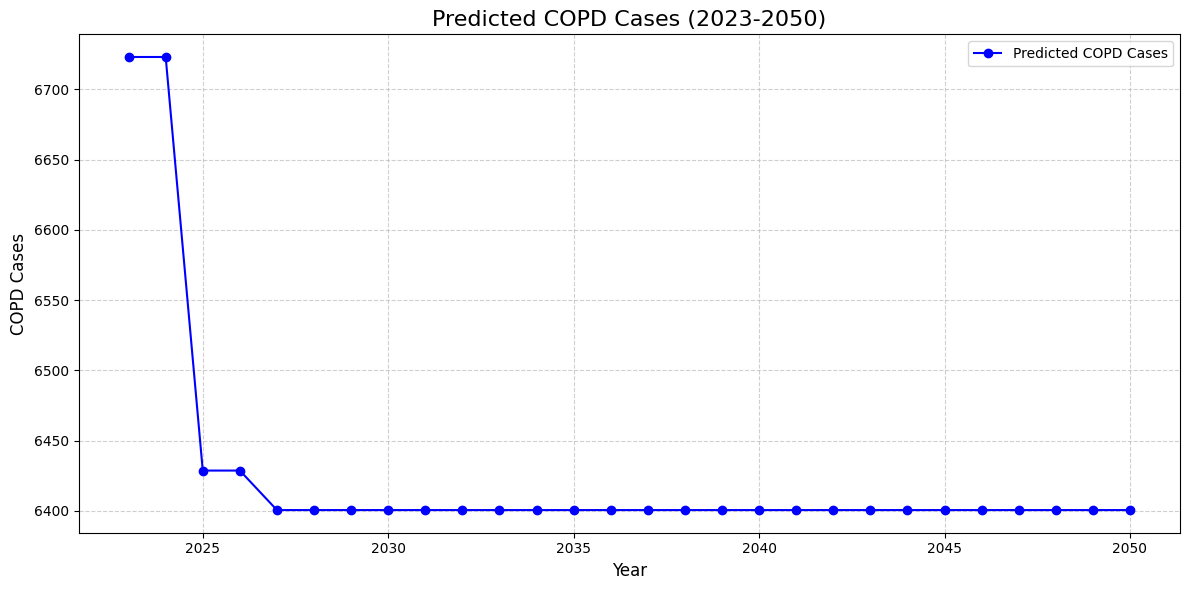

In [ ]:
# Plot COPD Cases Predictions
plt.figure(figsize=(12, 6))
plt.plot(future_df["year"], future_df["COPD Cases"], label="Predicted COPD Cases", color="blue", marker="o")
plt.title("Predicted COPD Cases (2023-2050)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("COPD Cases", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

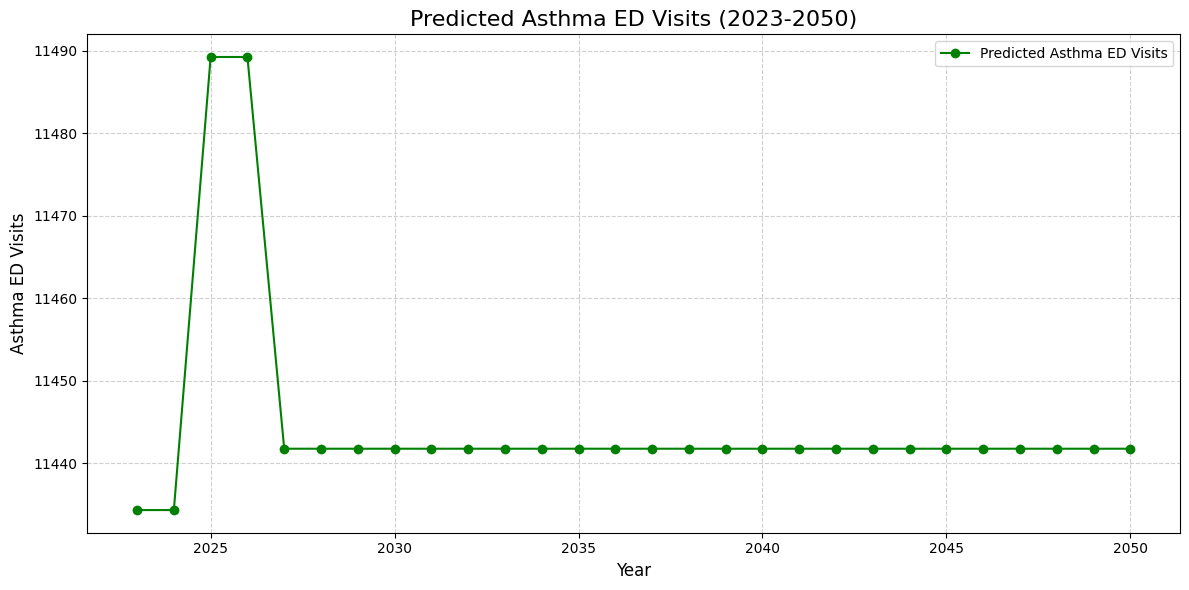

In [ ]:
# Plot Asthma ED Visits Predictions
plt.figure(figsize=(12, 6))
plt.plot(future_df["year"], future_df["Asthma ED Visit"], label="Predicted Asthma ED Visits", color="green", marker="o")
plt.title("Predicted Asthma ED Visits (2023-2050)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Asthma ED Visits", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


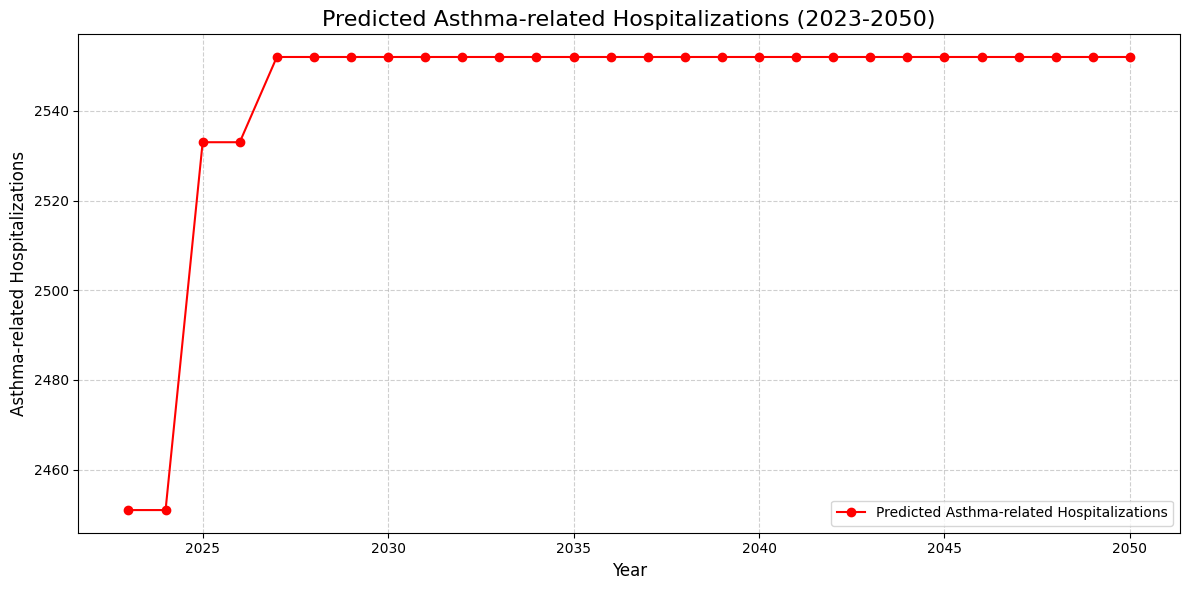

In [ ]:
# Plot Asthma-related Hospitalizations Predictions
plt.figure(figsize=(12, 6))
plt.plot(future_df["year"], future_df["Asthma-related-hospitalization"], label="Predicted Asthma-related Hospitalizations", color="red", marker="o")
plt.title("Predicted Asthma-related Hospitalizations (2023-2050)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Asthma-related Hospitalizations", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

**Asthma ED Visits and Hospitalizations**: While ED visits and hospitalizations stabilize, the consistently high numbers highlight the need for ongoing healthcare resources and city planning efforts to manage these cases effectively.

**Smoke Exposure:** Although smoke estimates show a small reduction over time, the levels remain high enough to impact public health significantly, underscoring the importance of proactive measures to reduce smoke exposure further.

The findings of this project underscore the significant and ongoing impact of wildfire smoke on public health, particularly on rates of COPD cases, asthma-related emergency department (ED) visits, and hospitalizations. While the projections show some stabilization in smoke-related health outcomes over the next three decades, the continued high levels of asthma-related ED visits and hospitalizations indicate that the problem remains persistent and demands sustained attention. This demonstrates that wildfire smoke is not only an environmental issue but also a chronic public health challenge requiring coordinated efforts from city leadership, healthcare systems, and the community.
